In [ ]:
import os
os.listdir()

['.config',
 'life-expectancy.csv',
 'maine-utah-florida-population-2023-10-03.csv',
 'Weekly_Counts_of_Death_by_Jurisdiction_and_Select_Causes_of_Death.csv',
 'Weekly_Counts_of_Deaths_by_Jurisdiction_and_Age.csv',
 'Hospital info.csv',
 'sample_data']

In [ ]:
import pandas as pd

input_file = 'Weekly_Counts_of_Death_by_Jurisdiction_and_Select_Causes_of_Death.csv'
output_file = 'Dataset.csv'

df = pd.read_csv(input_file)

# Filter out rows where 'Type' is 'unweighted'
df_filtered = df[df['Type'] != 'Unweighted']

columns_to_drop = ['Suppress', 'Note']
df_cleaned = df_filtered.drop(columns=columns_to_drop)
filtered_data = df_cleaned[(df_cleaned['Jurisdiction'].isin(['Florida','Maine', 'Utah'])) & (df_cleaned['Cause Group'] == "Alzheimer disease and dementia")]

filtered_data.to_csv(output_file, index=False)

print("Data cleaning and column removal completed. The cleaned data is saved as 'Dataset.csv'.")


<ipython-input-2-b75ab3537dac>:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


Data cleaning and column removal completed. The cleaned data is saved as 'Dataset.csv'.


In [ ]:
filtered_data['Number of Deaths'] = pd.to_numeric(filtered_data['Number of Deaths'], errors='coerce')

<ipython-input-3-1cf8742baf93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Number of Deaths'] = pd.to_numeric(filtered_data['Number of Deaths'], errors='coerce')


In [ ]:
filtered_data

,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Cause Group,Number of Deaths,Cause Subgroup,Time Period,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020,Type
6284,Florida,01/10/2015,FL,2015,1,Alzheimer disease and dementia,367,Alzheimer disease and dementia,2015-2019,356,NaN,NaN,Predicted (weighted)
6286,Florida,01/09/2016,FL,2016,1,Alzheimer disease and dementia,287,Alzheimer disease and dementia,2015-2019,356,NaN,NaN,Predicted (weighted)
6288,Florida,01/07/2017,FL,2017,1,Alzheimer disease and dementia,373,Alzheimer disease and dementia,2015-2019,356,NaN,NaN,Predicted (weighted)
6290,Florida,01/06/2018,FL,2018,1,Alzheimer disease and dementia,395,Alzheimer disease and dementia,2015-2019,356,NaN,NaN,Predicted (weighted)
6292,Florida,01/05/2019,FL,2019,1,Alzheimer disease and dementia,356,Alzheimer disease and dementia,2015-2019,356,NaN,NaN,Predicted (weighted)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40626,Utah,12/31/2016,UT,2016,52,Alzheimer disease and dementia,34,Alzheimer disease and dementia,2015-2019,40,NaN,NaN,Predicted (weighted)
40628,Utah,12/30/2017,UT,2017,52,Alzheimer disease and dementia,42,Alzheimer disease and dementia,2015-2019,40,NaN,NaN,Predicted (weighted)
40630,Utah,12/29/2018,UT,2018,52,Alzheimer disease and dementia,49,Alzheimer disease and dementia,2015-2019,40,NaN,NaN,Predicted (weighted)
40632,Utah,12/28/2019,UT,2019,52,Alzheimer disease and dementia,38,Alzheimer disease and dementia,2015-2019,40,NaN,NaN,Predicted (weighted)


In [ ]:
new_df=pd.read_csv('maine-utah-florida-population-2023-10-03.csv')

new_df

,date,Population,Annual Change,Jurisdiction,Year
0,12/1/00,695000,NaN,Maine,1900
1,12/1/01,699000,0.58,Maine,1901
2,12/1/02,703000,0.57,Maine,1902
3,12/1/03,709000,0.85,Maine,1903
4,12/1/04,719000,1.41,Maine,1904
...,...,...,...,...,...
364,12/1/18,21254926,1.32,Florida,2018
365,12/1/19,21492056,1.12,Florida,2019
366,12/1/20,21589602,0.45,Florida,2020
367,12/1/21,21828069,1.10,Florida,2021


In [ ]:
# Merge the two DataFrames based on both 'Year' and 'Jurisdiction'
merged_df = filtered_data.merge(new_df, on=['Year', 'Jurisdiction'], how='left')


# Save the merged DataFrame with population data to a new CSV file
output_file = 'Merged_Dataset.csv'
merged_df.to_csv(output_file, index=False)

In [ ]:
print(merged_df.columns)

Index(['Jurisdiction', 'Week Ending Date', 'State Abbreviation', 'Year',
       'Week', 'Cause Group', 'Number of Deaths', 'Cause Subgroup',
       'Time Period', 'Average Number of Deaths in Time Period',
       'Difference from 2015-2019 to 2020',
       'Percent Difference from 2015-2019 to 2020', 'Type', 'date',
       ' Population', ' Annual Change'],
      dtype='object')


In [ ]:
# Remove rows with NA values in the 'Population' column
df_cleaned = merged_df.dropna(subset=[' Population'])

df_cleaned.head(13)

,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Cause Group,Number of Deaths,Cause Subgroup,Time Period,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020,Type,date,Population,Annual Change
0,Florida,01/10/2015,FL,2015,1,Alzheimer disease and dementia,367,Alzheimer disease and dementia,2015-2019,356,NaN,NaN,Predicted (weighted),12/1/15,20219111.0,1.84
1,Florida,01/09/2016,FL,2016,1,Alzheimer disease and dementia,287,Alzheimer disease and dementia,2015-2019,356,NaN,NaN,Predicted (weighted),12/1/16,20627237.0,2.02
2,Florida,01/07/2017,FL,2017,1,Alzheimer disease and dementia,373,Alzheimer disease and dementia,2015-2019,356,NaN,NaN,Predicted (weighted),12/1/17,20977089.0,1.70
3,Florida,01/06/2018,FL,2018,1,Alzheimer disease and dementia,395,Alzheimer disease and dementia,2015-2019,356,NaN,NaN,Predicted (weighted),12/1/18,21254926.0,1.32
4,Florida,01/05/2019,FL,2019,1,Alzheimer disease and dementia,356,Alzheimer disease and dementia,2015-2019,356,NaN,NaN,Predicted (weighted),12/1/19,21492056.0,1.12
5,Florida,01/04/2020,FL,2020,1,Alzheimer disease and dementia,372,Alzheimer disease and dementia,2020,372,16,4.5,Predicted (weighted),12/1/20,21589602.0,0.45
6,Florida,01/09/2021,FL,2021,1,Alzheimer disease and dementia,399,Alzheimer disease and dementia,2021,399,43,12.1,Predicted (weighted),12/1/21,21828069.0,1.10
7,Florida,01/08/2022,FL,2022,1,Alzheimer disease and dementia,405,Alzheimer disease and dementia,2022,405,49,13.8,Predicted (weighted),12/1/22,22244823.0,1.91
9,Florida,01/17/2015,FL,2015,2,Alzheimer disease and dementia,346,Alzheimer disease and dementia,2015-2019,354,NaN,NaN,Predicted (weighted),12/1/15,20219111.0,1.84
10,Florida,01/16/2016,FL,2016,2,Alzheimer disease and dementia,342,Alzheimer disease and dementia,2015-2019,354,NaN,NaN,Predicted (weighted),12/1/16,20627237.0,2.02


In [ ]:
# Normalize 'Number of Deaths' based on 'Population' to calculate death rate per 100000 people
df_cleaned['Death Rate per 100000'] = (df_cleaned['Number of Deaths'] / df_cleaned[' Population']) * 100000

<ipython-input-9-be8aaeeddc68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Death Rate per 100000'] = (df_cleaned['Number of Deaths'] / df_cleaned[' Population']) * 100000


In [ ]:
df_cleaned

,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Cause Group,Number of Deaths,Cause Subgroup,Time Period,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020,Type,date,Population,Annual Change,Death Rate per 100000
0,Florida,01/10/2015,FL,2015,1,Alzheimer disease and dementia,367,Alzheimer disease and dementia,2015-2019,356,NaN,NaN,Predicted (weighted),12/1/15,20219111.0,1.84,1.815114
1,Florida,01/09/2016,FL,2016,1,Alzheimer disease and dementia,287,Alzheimer disease and dementia,2015-2019,356,NaN,NaN,Predicted (weighted),12/1/16,20627237.0,2.02,1.391364
2,Florida,01/07/2017,FL,2017,1,Alzheimer disease and dementia,373,Alzheimer disease and dementia,2015-2019,356,NaN,NaN,Predicted (weighted),12/1/17,20977089.0,1.70,1.778130
3,Florida,01/06/2018,FL,2018,1,Alzheimer disease and dementia,395,Alzheimer disease and dementia,2015-2019,356,NaN,NaN,Predicted (weighted),12/1/18,21254926.0,1.32,1.858393
4,Florida,01/05/2019,FL,2019,1,Alzheimer disease and dementia,356,Alzheimer disease and dementia,2015-2019,356,NaN,NaN,Predicted (weighted),12/1/19,21492056.0,1.12,1.656426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,Utah,12/31/2016,UT,2016,52,Alzheimer disease and dementia,34,Alzheimer disease and dementia,2015-2019,40,NaN,NaN,Predicted (weighted),12/1/16,3044241.0,2.03,1.116863
1340,Utah,12/30/2017,UT,2017,52,Alzheimer disease and dementia,42,Alzheimer disease and dementia,2015-2019,40,NaN,NaN,Predicted (weighted),12/1/17,3103540.0,1.95,1.353293
1341,Utah,12/29/2018,UT,2018,52,Alzheimer disease and dementia,49,Alzheimer disease and dementia,2015-2019,40,NaN,NaN,Predicted (weighted),12/1/18,3155153.0,1.66,1.553015
1342,Utah,12/28/2019,UT,2019,52,Alzheimer disease and dementia,38,Alzheimer disease and dementia,2015-2019,40,NaN,NaN,Predicted (weighted),12/1/19,3203383.0,1.53,1.186246


In [ ]:
# Convert 'Week Ending' to datetime
df_cleaned['Week Ending Date'] = pd.to_datetime(df_cleaned['Week Ending Date'])

# Extract year and month from the 'Week Ending' column
df_cleaned['Year'] = df_cleaned['Week Ending Date'].dt.year
df_cleaned['Month'] = df_cleaned['Week Ending Date'].dt.month

# Group data by year and month and calculate the average number of deaths
monthly_avg_deaths = df_cleaned.groupby(['Jurisdiction', 'Year', 'Month'])['Death Rate per 100000'].mean().reset_index()

# Display the resulting DataFrame with average deaths per month
print(monthly_avg_deaths)

    Jurisdiction  Year  Month  Death Rate per 100000
0        Florida  2015      1               1.711252
1        Florida  2015      2               1.713725
2        Florida  2015      3               1.593789
3        Florida  2015      4               1.467671
4        Florida  2015      5               1.513420
..           ...   ...    ...                    ...
283         Utah  2022      8               1.027863
284         Utah  2022      9               1.368019
285         Utah  2022     10               1.336962
286         Utah  2022     11               1.264494
287         Utah  2022     12               1.520350

[288 rows x 4 columns]


<ipython-input-11-6ba374e26d6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Week Ending Date'] = pd.to_datetime(df_cleaned['Week Ending Date'])
<ipython-input-11-6ba374e26d6e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Week Ending Date'].dt.year
<ipython-input-11-6ba374e26d6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
monthly_avg_deaths.head(13)

,Jurisdiction,Year,Month,Death Rate per 100000
0,Florida,2015,1,1.711252
1,Florida,2015,2,1.713725
2,Florida,2015,3,1.593789
3,Florida,2015,4,1.467671
4,Florida,2015,5,1.513420
5,Florida,2015,6,1.475090
6,Florida,2015,7,1.429341
7,Florida,2015,8,1.337349
8,Florida,2015,9,1.392247
9,Florida,2015,10,1.479788


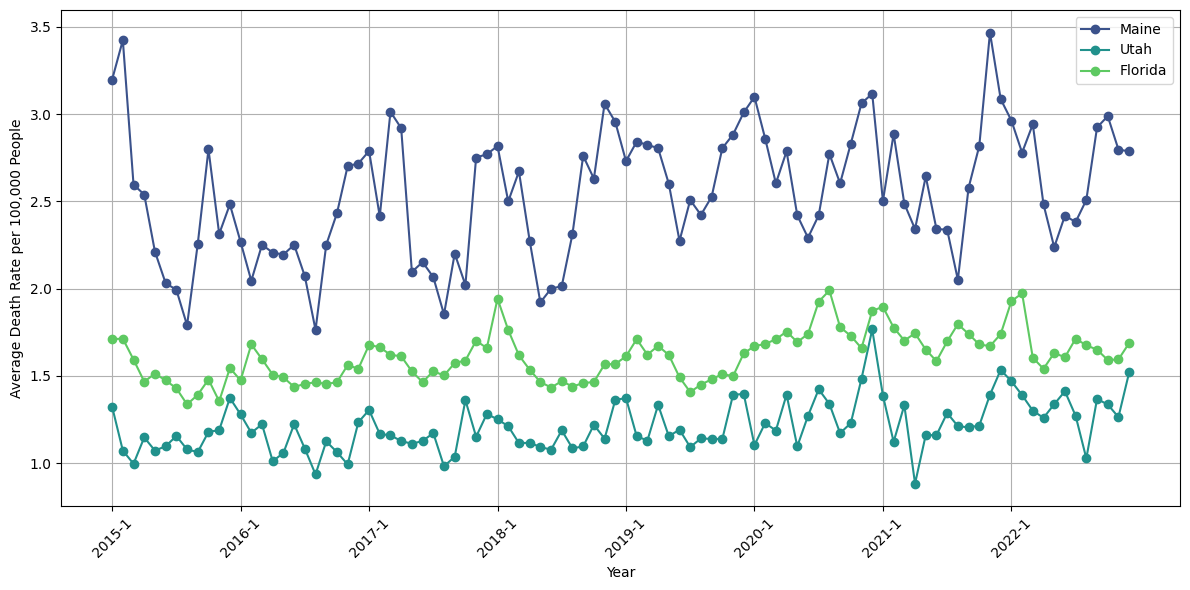

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for Maine and Utah
maine_data = df_cleaned[df_cleaned['Jurisdiction'] == 'Maine']
utah_data = df_cleaned[df_cleaned['Jurisdiction'] == 'Utah']
florida_data = df_cleaned[df_cleaned['Jurisdiction'] == 'Florida']

# Group data by year and month and calculate the average number of deaths
maine_monthly_avg = maine_data.groupby(['Year', 'Month'])['Death Rate per 100000'].mean().reset_index()
utah_monthly_avg = utah_data.groupby(['Year', 'Month'])['Death Rate per 100000'].mean().reset_index()
florida_monthly_avg = florida_data.groupby(['Year', 'Month'])['Death Rate per 100000'].mean().reset_index()

# Create a color palette that transitions from green to blue
colors = sns.color_palette("viridis", n_colors=3)

# Create separate time series plots for Maine, Utah, and Florida
plt.figure(figsize=(12, 6))
plt.plot(
    maine_monthly_avg['Year'] + (maine_monthly_avg['Month'] - 1) / 12,
    maine_monthly_avg['Death Rate per 100000'],
    label='Maine',
    marker='o',
    linestyle='-',
    color=colors[0]
)
plt.plot(
    utah_monthly_avg['Year'] + (utah_monthly_avg['Month'] - 1) / 12,
    utah_monthly_avg['Death Rate per 100000'],
    label='Utah',
    marker='o',
    linestyle='-',
    color=colors[1]
)
plt.plot(
    florida_monthly_avg['Year'] + (florida_monthly_avg['Month'] - 1) / 12,
    florida_monthly_avg['Death Rate per 100000'],
    label='Florida',
    marker='o',
    linestyle='-',
    color=colors[2]
)

# Set chart labels and title
plt.xlabel('Year')
plt.ylabel('Average Death Rate per 100,000 People')
plt.title('')

# Set custom x-axis ticks and labels
years = maine_monthly_avg['Year'].unique()
months = range(1, 13)
xtick_positions = [year + (month - 1) / 12 for year in years for month in months if month % 12 == 1]  # Display labels every twelve months
xtick_labels = [f'{year}-{month}' for year in years for month in months if month % 12 == 1]
plt.xticks(xtick_positions, xtick_labels, rotation=45)

# Add a legend
plt.legend()

# Customize the appearance
plt.grid(True)
plt.tight_layout()

# Show the chart
plt.show()

<ipython-input-14-7a4325fdc2d1>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=le_filt['Year'], y=le_filt['Life expectancy at birth (historical)'], marker='o', palette='viridis')


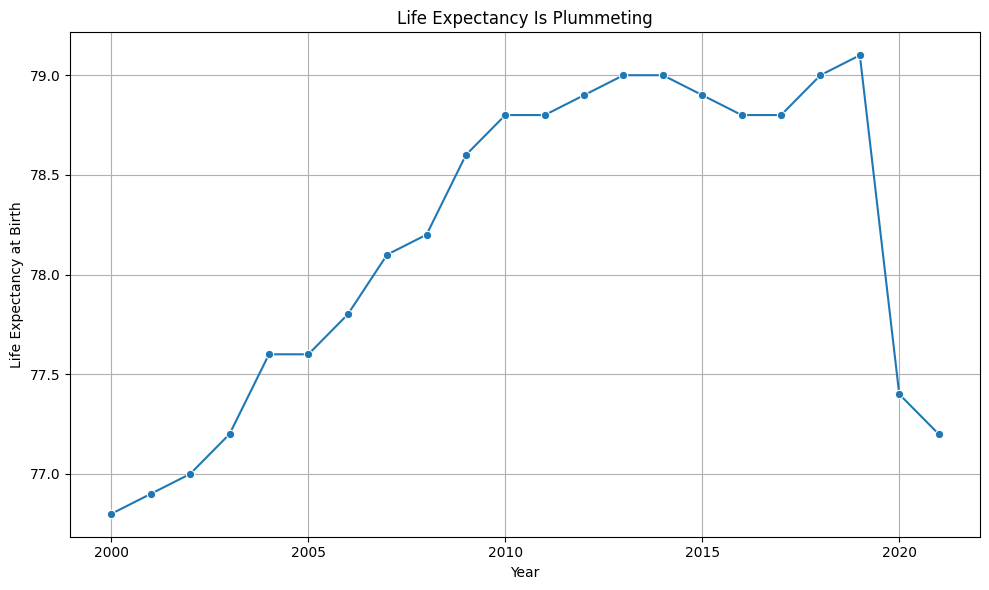

In [ ]:
le_df = pd.read_csv('life-expectancy.csv')

le_filt = le_df[(le_df['Entity'] == 'United States') & (le_df['Year'] >= 2000)]

# Create a line plot for life expectancy
plt.figure(figsize=(10, 6))
sns.lineplot(x=le_filt['Year'], y=le_filt['Life expectancy at birth (historical)'], marker='o', palette='viridis')

# Set chart labels and title
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth')
plt.title('Life Expectancy Is Plummeting')

# Customize the appearance
plt.grid(True)
plt.tight_layout()

# Show the chart
plt.show()

In [ ]:
age_df = pd.read_csv('Weekly_Counts_of_Deaths_by_Jurisdiction_and_Age.csv')

age_filt = age_df[(age_df['Jurisdiction'] == 'United States')]

new_age = age_filt[age_filt['Type'] != 'Unweighted']

columns_to_drop = ['Suppress', 'Note']
us_data = new_age.drop(columns=columns_to_drop)

us_data

<ipython-input-15-40d98851ccc1>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  age_df = pd.read_csv('Weekly_Counts_of_Deaths_by_Jurisdiction_and_Age.csv')


,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Age Group,Number of Deaths,Time Period,Type
115065,United States,01/10/2015,US,2015,1,25-44 years,2416.0,2015-2019,Predicted (weighted)
115066,United States,01/17/2015,US,2015,2,25-44 years,2379.0,2015-2019,Predicted (weighted)
115067,United States,01/24/2015,US,2015,3,25-44 years,2332.0,2015-2019,Predicted (weighted)
115068,United States,01/31/2015,US,2015,4,25-44 years,2213.0,2015-2019,Predicted (weighted)
115069,United States,02/07/2015,US,2015,5,25-44 years,2442.0,2015-2019,Predicted (weighted)
...,...,...,...,...,...,...,...,...,...
117784,United States,08/19/2023,US,2023,33,Under 25 years,1140.0,2023,Predicted (weighted)
117785,United States,08/26/2023,US,2023,34,Under 25 years,1107.0,2023,Predicted (weighted)
117786,United States,09/02/2023,US,2023,35,Under 25 years,902.0,2023,Predicted (weighted)
117787,United States,09/09/2023,US,2023,36,Under 25 years,677.0,2023,Predicted (weighted)


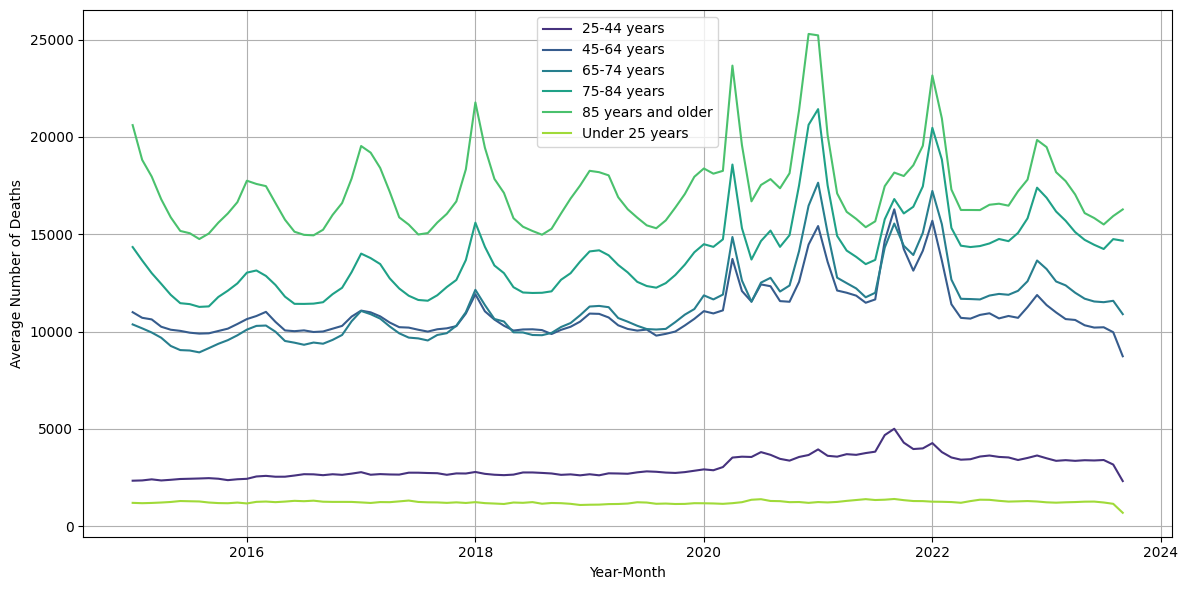

In [ ]:
# Extract 'Year' and 'Month' from 'Week Ending' column
us_data['Week Ending'] = pd.to_datetime(us_data['Week Ending Date'])
us_data['Year'] = us_data['Week Ending'].dt.year
us_data['Month'] = us_data['Week Ending'].dt.month

# Group data by 'Year', 'Month', and 'Age Group' and calculate the average number of deaths
monthly_avg_deaths = us_data.groupby(['Year', 'Month', 'Age Group'])['Number of Deaths'].mean().reset_index()

# Define a list of unique Age Groups
age_groups = monthly_avg_deaths['Age Group'].unique()

# Create a color palette that transitions from green to blue
colors = sns.color_palette("viridis", len(age_groups))

# Create a line graph for each Age Group
plt.figure(figsize=(12, 6))
for i, age_group in enumerate(age_groups):
    age_group_data = monthly_avg_deaths[monthly_avg_deaths['Age Group'] == age_group]
    label = age_group
    color = colors[i]
    plt.plot(
        age_group_data['Year'] + (age_group_data['Month'] - 1) / 12,
        age_group_data['Number of Deaths'],
        label=label,
        color=color
    )

# Set chart labels and title
plt.xlabel('Year-Month')
plt.ylabel('Average Number of Deaths')
plt.title('')

# Customize the appearance
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the chart
plt.show()

In [ ]:
hosp_df = pd.read_csv('Hospital info.csv')

# Filter the data for specified counties and 'Hours Type'
counties = ['San Francisco', 'Lake', 'Santa Clara']
hours_types = ['Registered Nurse', 'Aides & Orderlies']
hosp_filt = hosp_df[(hosp_df['County Name'].isin(counties)) & (hosp_df['Hours Type'].isin(hours_types))]


<ipython-input-22-2dc30b23fbff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hosp_filt['Begin Date'] = pd.to_datetime(hosp_filt['Begin Date'])
<ipython-input-22-2dc30b23fbff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hosp_filt['Year'] = hosp_filt['Begin Date'].dt.year
<ipython-input-22-2dc30b23fbff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

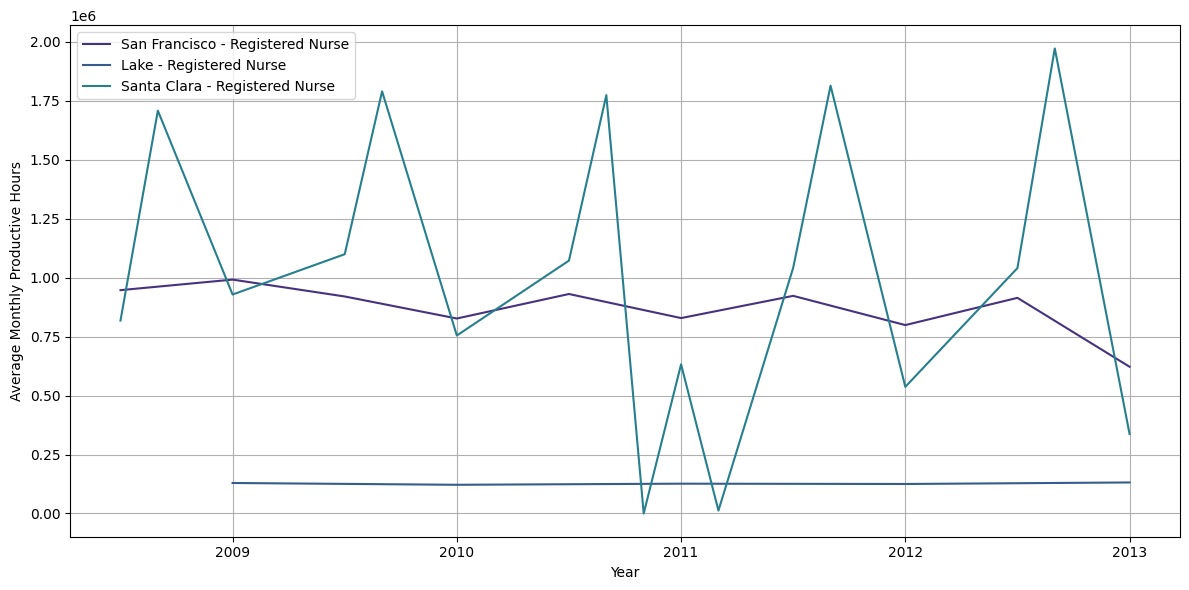

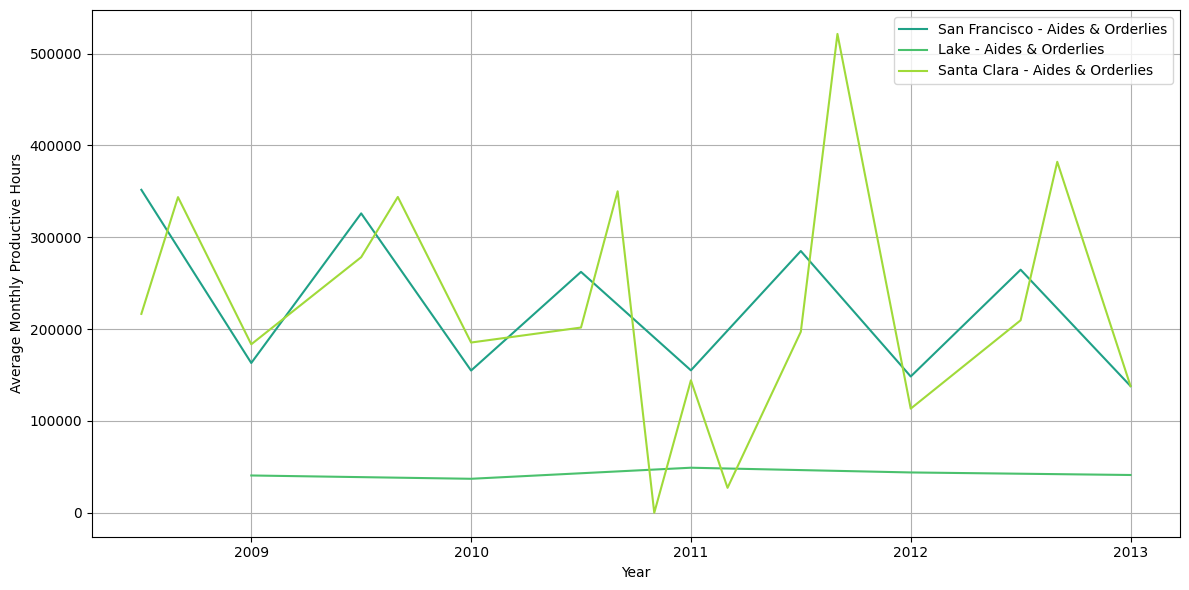

In [ ]:
# Extract 'Year' and 'Month' from 'Begin Date' column
hosp_filt['Begin Date'] = pd.to_datetime(hosp_filt['Begin Date'])
hosp_filt['Year'] = hosp_filt['Begin Date'].dt.year
hosp_filt['Month'] = hosp_filt['Begin Date'].dt.month

# Group data by 'Year', 'Month', 'County Name', and 'Hours Type' and calculate the sum of productive hours
monthly_avg_productive_hours = hosp_filt.groupby(['Year', 'Month', 'County Name', 'Hours Type'])['Productive Hours'].mean().reset_index()

# Create a list of shades of blue for the lines
blue_shades = ['#1f77b4', '#3594ed', '#61a5ff']
colors = sns.color_palette("viridis", len(counties) * len(hours_types))

# Create separate line charts for each Hours Type (Registered Nurse and Aides & Orderlies)
for i, hours_type in enumerate(hours_types):
    plt.figure(figsize=(12, 6))
    for j, county in enumerate(counties):
        data = monthly_avg_productive_hours[(monthly_avg_productive_hours['County Name'] == county) & (monthly_avg_productive_hours['Hours Type'] == hours_type)]
        label = f'{county} - {hours_type}'

        # Use a different shade of blue for each line
        plt.plot(
            data['Year'] + (data['Month'] - 1) / 12,
            data['Productive Hours'],
            label=label,
            #color=blue_shades[j]
            color=colors[i * len(counties) + j]
        )

    # Set chart labels and title
    plt.xlabel('Year')
    plt.ylabel('Average Monthly Productive Hours')
    plt.title('')

    # Customize the appearance
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Show the chart
    plt.show()